# Section 1: Data Cleaning 

In [64]:
import pandas as pd

#loading the dataset 
df = pd.read_csv('Customer_Purchasing_Behaviors.csv')

#display the first 5 rows
print(df.head())

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


In [65]:
# Identifying the shape of the data 
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 238, Number of columns: 7


In [66]:
#Verifying the data types
print(df.dtypes)

user_id                 int64
age                     int64
annual_income           int64
purchase_amount         int64
loyalty_score         float64
region                 object
purchase_frequency      int64
dtype: object


In [67]:
#Let's look at the summary statistics 
print(df.describe())

          user_id         age  annual_income  purchase_amount  loyalty_score  \
count  238.000000  238.000000     238.000000       238.000000     238.000000   
mean   119.500000   38.676471   57407.563025       425.630252       6.794118   
std     68.848868    9.351118   11403.875717       140.052062       1.899047   
min      1.000000   22.000000   30000.000000       150.000000       3.000000   
25%     60.250000   31.000000   50000.000000       320.000000       5.500000   
50%    119.500000   39.000000   59000.000000       440.000000       7.000000   
75%    178.750000   46.750000   66750.000000       527.500000       8.275000   
max    238.000000   55.000000   75000.000000       640.000000       9.500000   

       purchase_frequency  
count          238.000000  
mean            19.798319  
std              4.562884  
min             10.000000  
25%             17.000000  
50%             20.000000  
75%             23.000000  
max             28.000000  


In [68]:
#This will let us get a summary of the dataset structure : including column data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB
None


In [69]:
#I am going to remove the user_id column and apply that to the dataframe
df.drop(columns=['user_id'], inplace=True)


# Verify that the column is removed by checking the DataFrame's columns
print(df.columns)

Index(['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'region',
       'purchase_frequency'],
      dtype='object')


# Section 2: Feature Scaling & Encoding

In [70]:
# Use one-hot encoding for the 'region' column
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Check the updated DataFrame
print(data.head())

   age  annual_income  purchase_amount  loyalty_score  purchase_frequency  \
0   25          45000              200            4.5                  12   
1   34          55000              350            7.0                  18   
2   45          65000              500            8.0                  22   
3   22          30000              150            3.0                  10   
4   29          47000              220            4.8                  13   

   region_North  region_South  region_West  
0             1             0            0  
1             0             1            0  
2             0             0            1  
3             0             0            0  
4             1             0            0  


In [71]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select relevant columns for scaling
features_to_scale = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(df[features_to_scale])

# Convert scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale)

# Add the region columns back to the scaled DataFrame
df_scaled[['region_North', 'region_South', 'region_West']] = df[['region_North', 'region_South', 'region_West']]

print(df_scaled.head())

        age  annual_income  purchase_amount  loyalty_score  \
0 -1.465632      -1.090306        -1.614441      -1.210582   
1 -0.501151      -0.211563        -0.541153       0.108642   
2  0.677658       0.667180         0.532134       0.636332   
3 -1.787125      -2.408420        -1.972203      -2.002117   
4 -1.036974      -0.914557        -1.471336      -1.052275   

   purchase_frequency  region_North  region_South  region_West  
0           -1.712679             1             0            0  
1           -0.394950             0             1            0  
2            0.483536             0             0            1  
3           -2.151922             0             0            0  
4           -1.493057             1             0            0  


# Section 3: Clustering Analysis

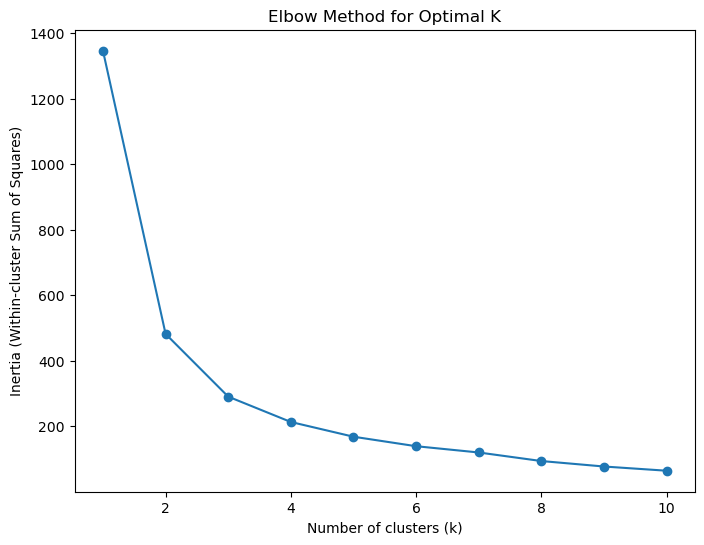

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Creating an empty list to store inertia values
inertia = []

# Loop over a range of potential cluster numbers
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init to 10
    kmeans.fit(df_scaled)  # Fit the KMeans algorithm on the scaled data
    inertia.append(kmeans.inertia_)  # Append the inertia value for each k

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')

#Saving the plot as an image 
plt.savefig('elbow_method.png')

plt.show()

In [73]:
# We are applying K-means clustering with the optimal number of clusters (k=3)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(df_scaled)

# We are going to add the cluster labels to the scaled DataFrame
df_scaled['Cluster'] = kmeans.labels_

# Adding the cluster labels to the original unscaled DataFrame for interpretation
df['Cluster'] = kmeans.labels_

# We are going to check the first few rows to verify
print(df.head())

   age  annual_income  purchase_amount  loyalty_score  purchase_frequency  \
0   25          45000              200            4.5                  12   
1   34          55000              350            7.0                  18   
2   45          65000              500            8.0                  22   
3   22          30000              150            3.0                  10   
4   29          47000              220            4.8                  13   

   region_North  region_South  region_West  Cluster  
0             1             0            0        0  
1             0             1            0        1  
2             0             0            1        2  
3             0             0            0        0  
4             1             0            0        0  


In [74]:
# Let's look at the summary statistics for each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

               age  annual_income  purchase_amount  loyalty_score  \
Cluster                                                             
0        27.338235   43088.235294       244.264706       4.288235   
1        38.306931   58178.217822       435.841584       7.023762   
2        50.391304   70391.304348       589.420290       8.927536   

         purchase_frequency  region_North  region_South  region_West  
Cluster                                                               
0                 13.955882      0.647059      0.235294     0.073529  
1                 20.168317      0.178218      0.514851     0.277228  
2                 25.014493      0.231884      0.130435     0.637681  


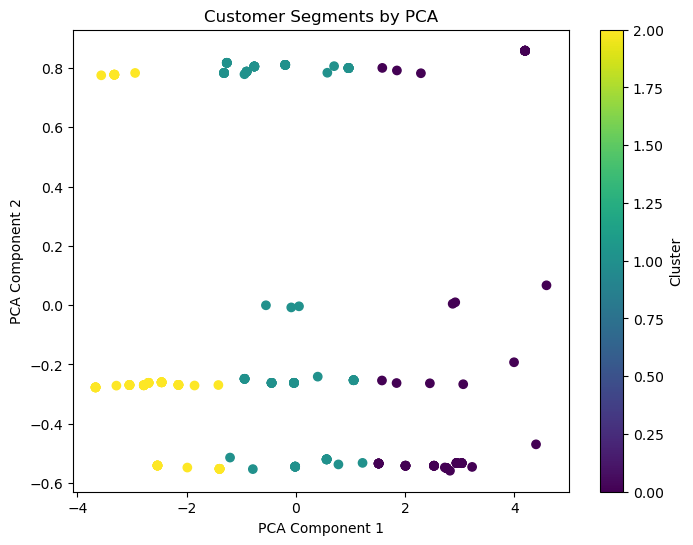

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# We are going to reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=['Cluster']))

#Let's create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_scaled['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segments by PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

#Saving the PCA plot as an image
plt.savefig('pca_clusters.png')

plt.show()